<a href="https://colab.research.google.com/github/aimlresearcher/AI-COURSE/blob/main/03_UCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform Cost Search
- Uses a priority queue (min-heap) to always expand the lowest-cost node first.
- Tracks the cost to reach each node (cost_so_far).
- Updates the path only if a cheaper route is found.
- Reconstructs the path once the goal is reached.

In [1]:
import heapq

# Define the graph with weighted edges
graph = {
    'A': [('B', 13), ('C', 7), ('F', 5)],
    'B': [('A', 13), ('H', 3), ('D', 3)],
    'C': [('A', 7), ('D', 5), ('E', 1), ('G', 5)],
    'D': [('B', 3), ('C', 5), ('H', 2)],
    'E': [('C', 1), ('G', 4)],
    'F': [('A', 5), ('G', 6)],
    'G': [('F', 6), ('C', 5), ('E', 4)],
    'H': [('B', 3), ('D', 2)]
}

# UCS function to find the lowest-cost path
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            return reconstruct_path(parent, goal), current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "A"
goal_node = "H"

# Run UCS and print the shortest cost path
ucs_path, total_cost = uniform_cost_search(graph, start_node, goal_node)

if ucs_path:
    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")



UCS Shortest Path: A → C → D → H
Total Cost: 14


# Uniform Cost Search Algorith Using Networkx
- Uses a priority queue (min-heap) to always expand the lowest-cost node first.
- Graph dynamically updates at each step:
  - Red: Current node being expanded.
  - Green: Nodes in the priority queue.
  - Blue: Visited nodes.
  - Gray: Unvisited nodes.
- Displays priority queue and visited set in the title at each step.
- Final shortest path is highlighted in red.

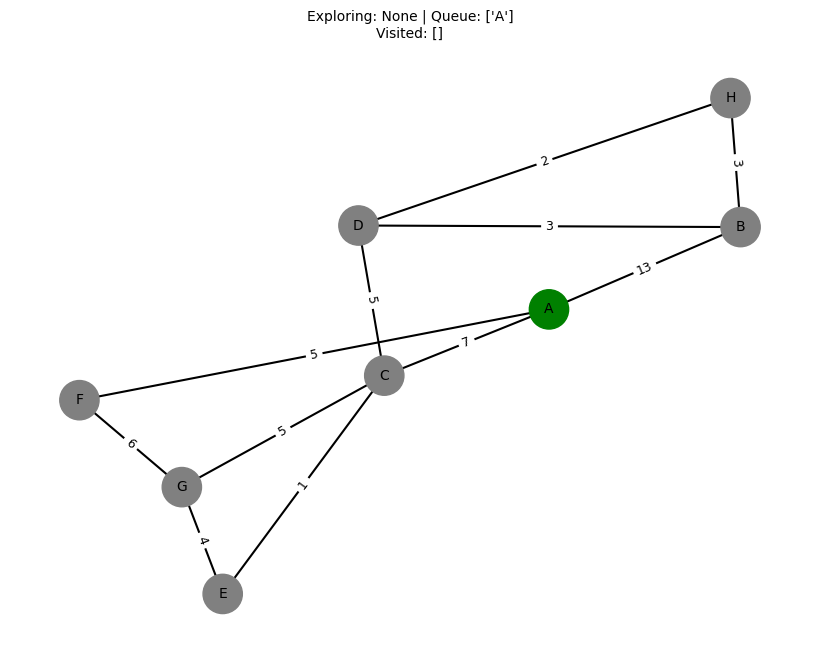

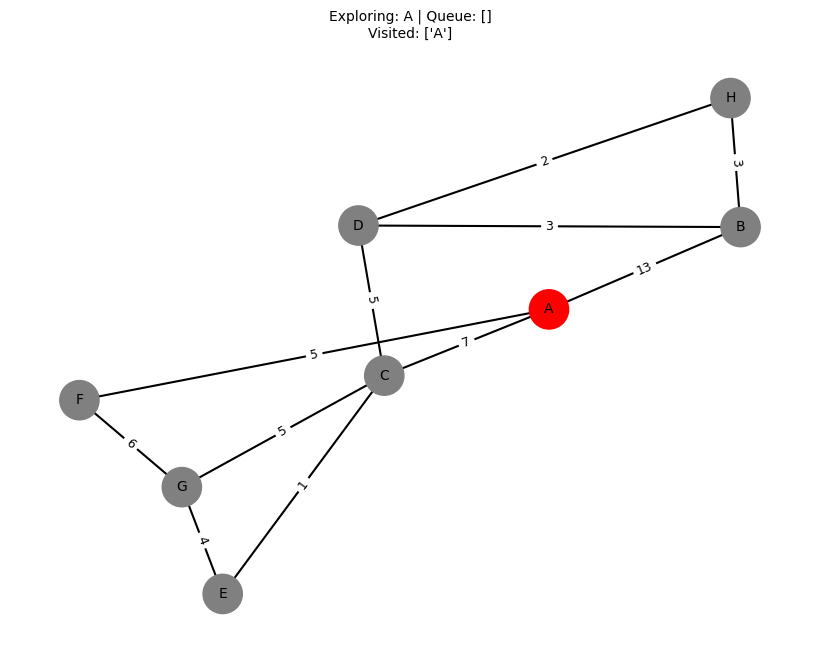

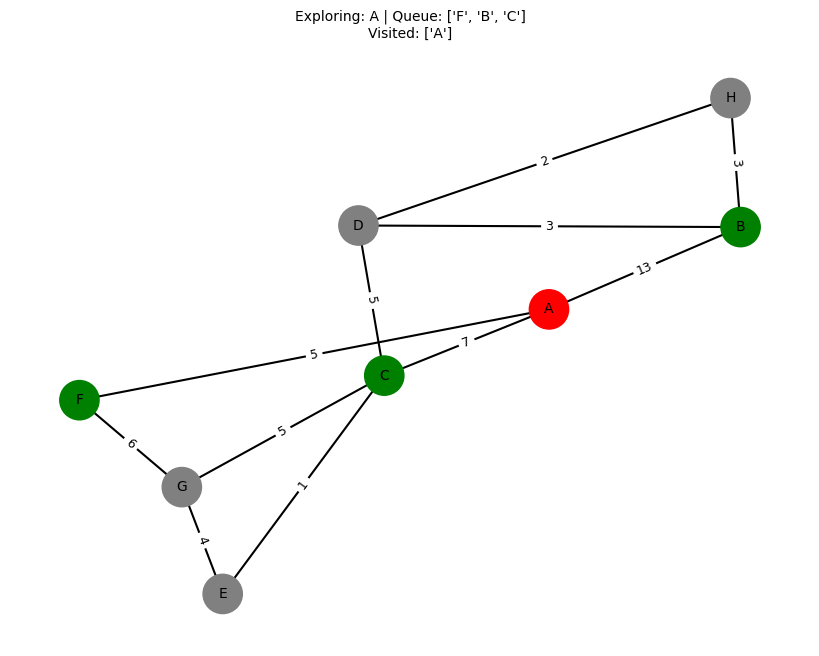

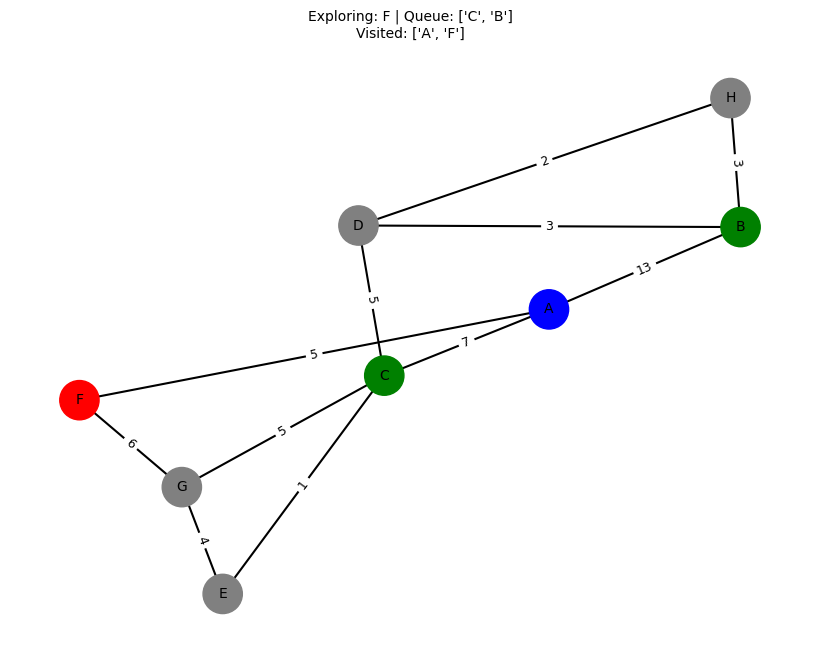

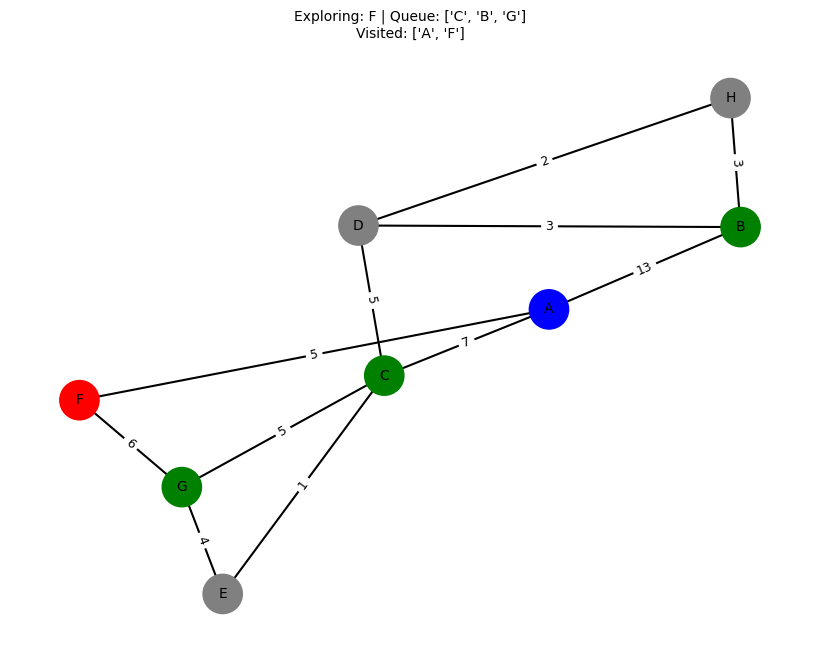

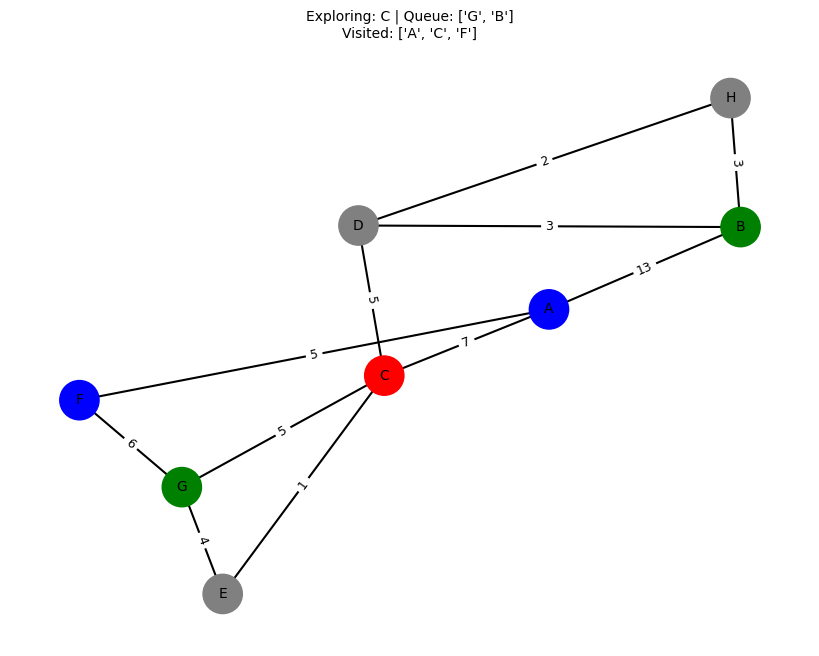

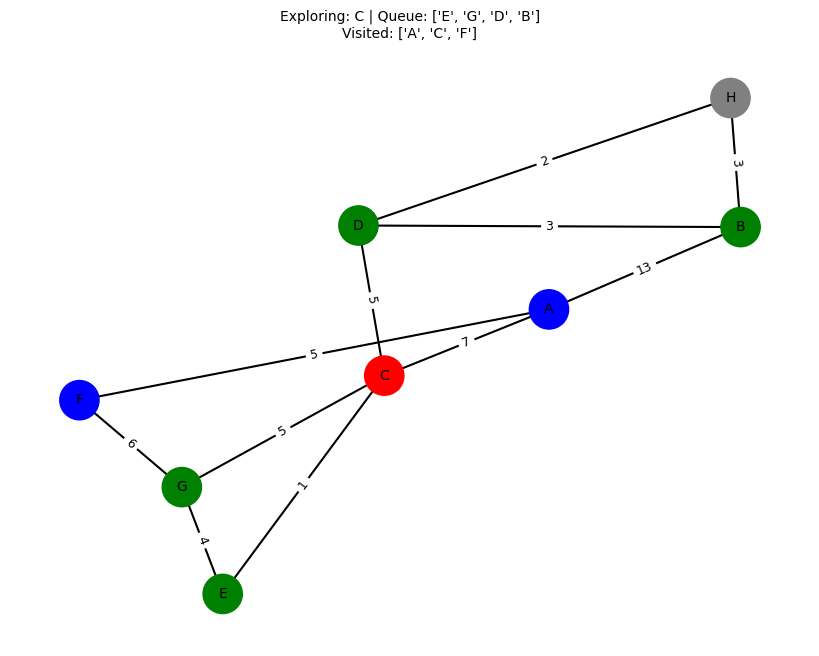

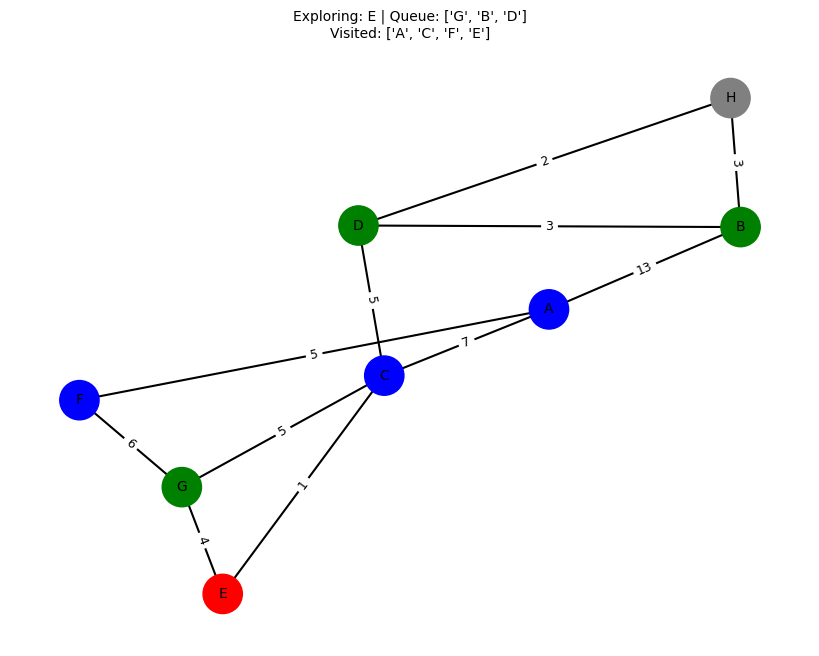

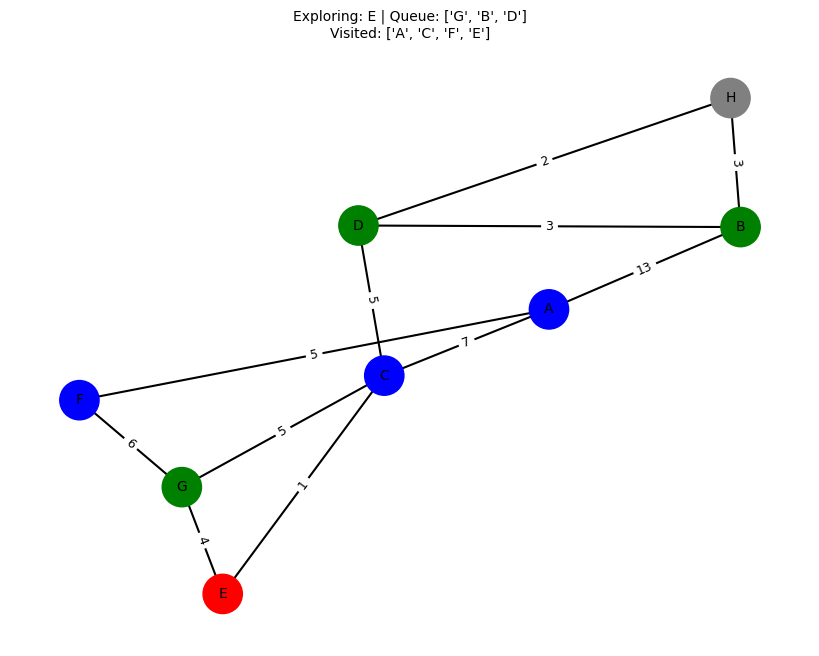

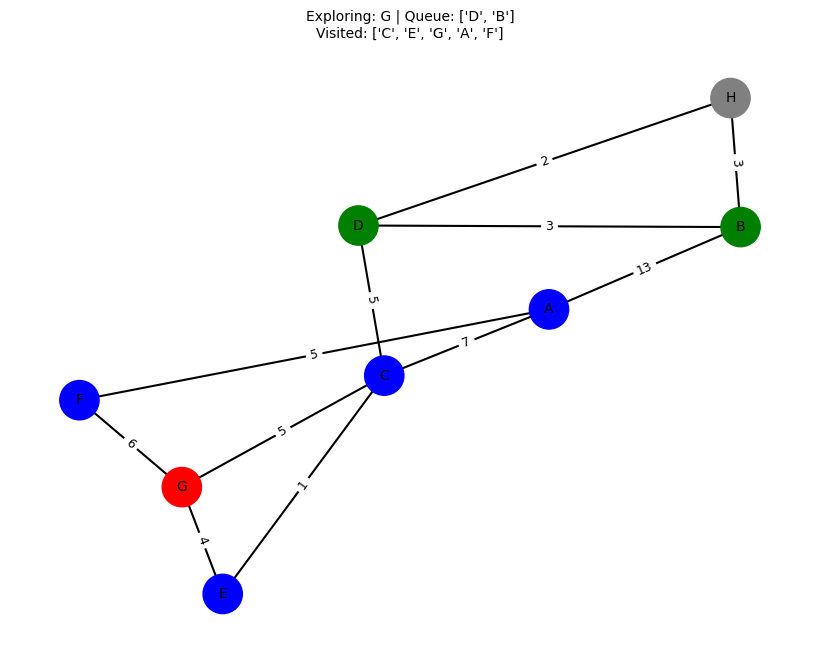

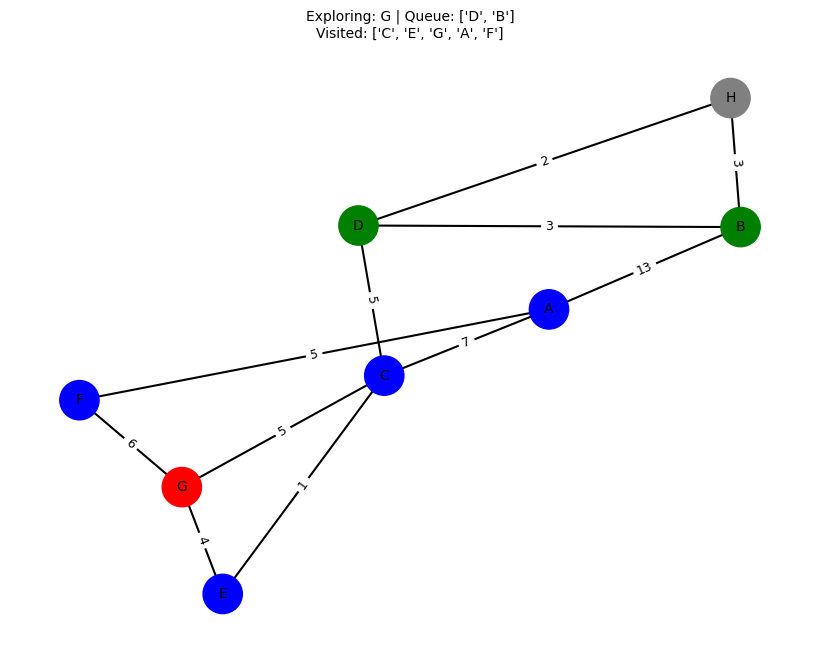

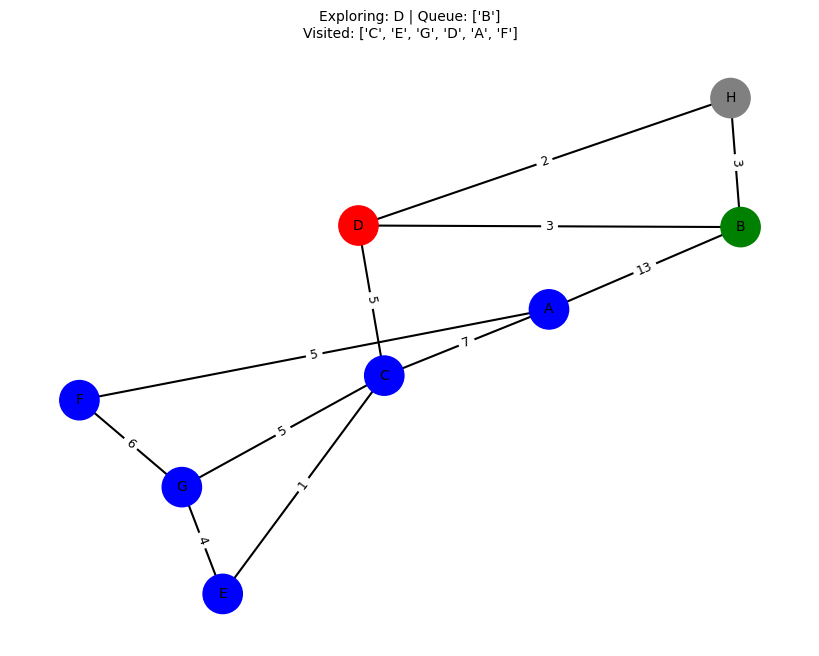

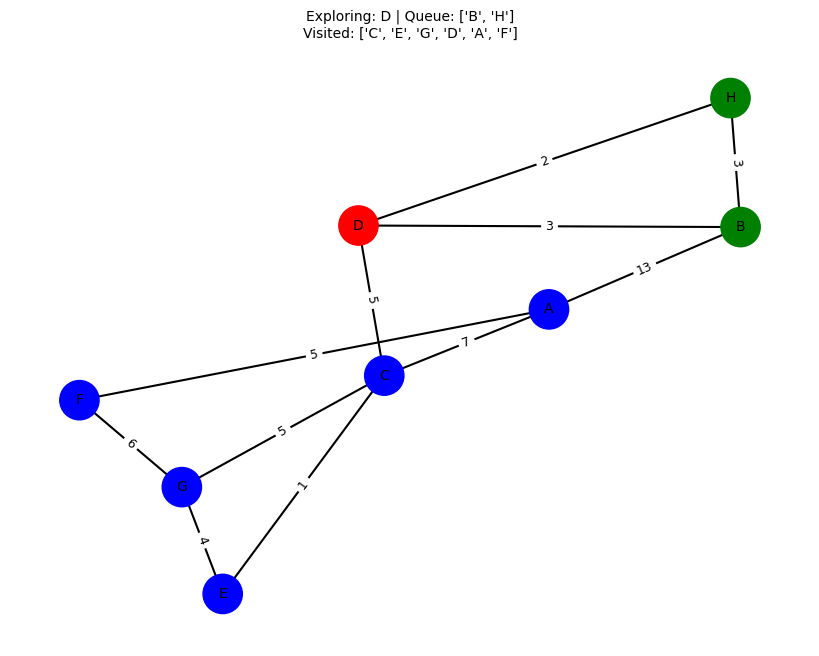

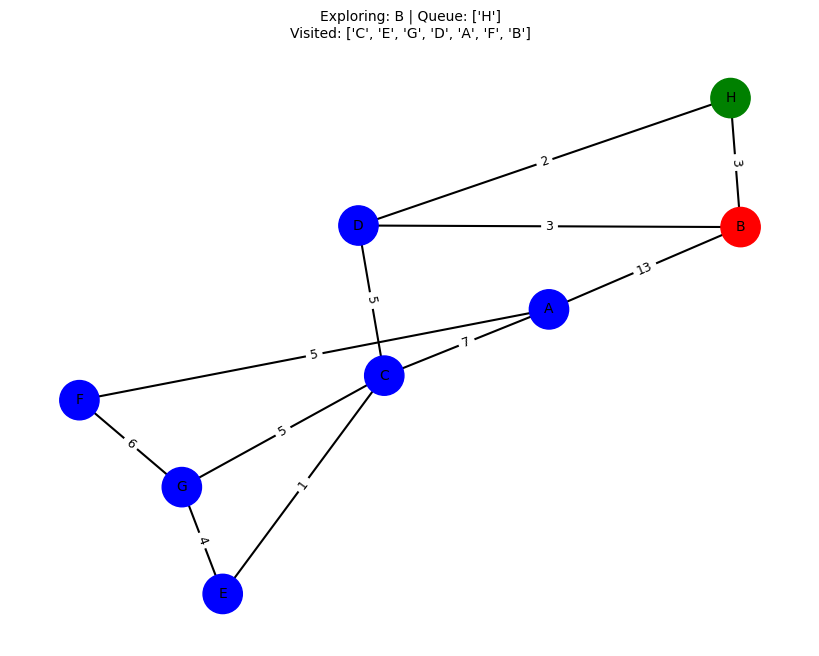

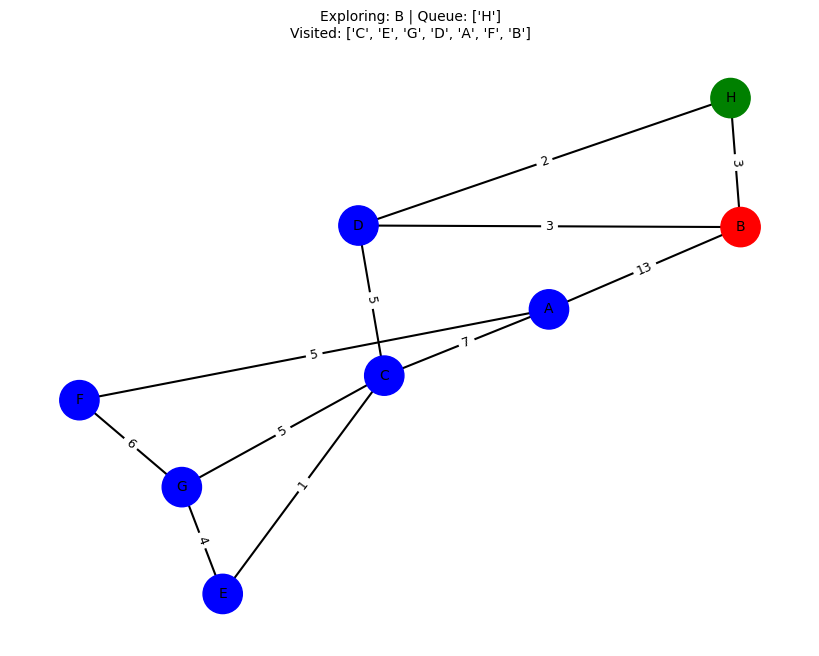

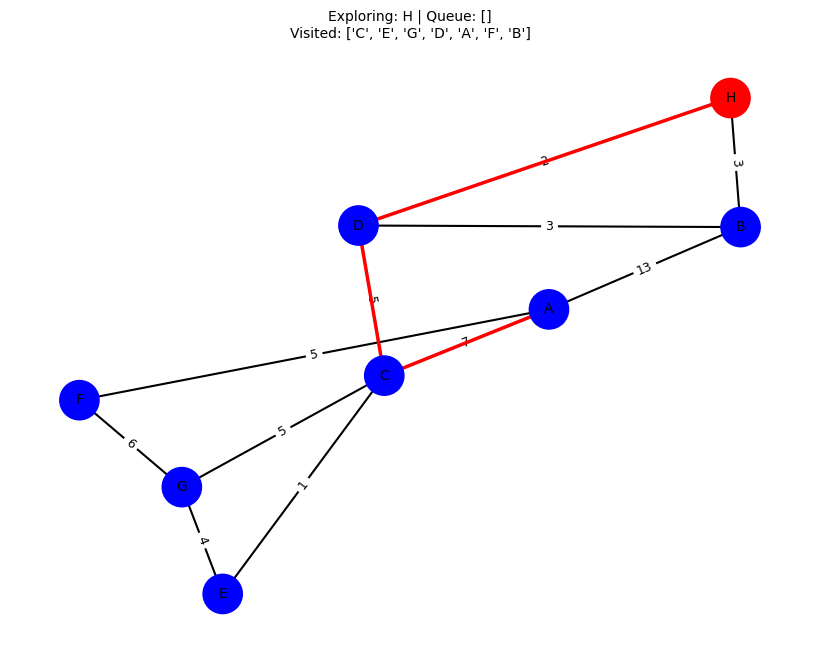


UCS Shortest Path: A → C → D → H
Total Cost: 14


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time

# Define the graph with weighted edges
graph = {
    'A': [('B', 13), ('C', 7), ('F', 5)],
    'B': [('A', 13), ('H', 3), ('D', 3)],
    'C': [('A', 7), ('D', 5), ('E', 1), ('G', 5)],
    'D': [('B', 3), ('C', 5), ('H', 2)],
    'E': [('C', 1), ('G', 4)],
    'F': [('A', 5), ('G', 6)],
    'G': [('F', 6), ('C', 5), ('E', 4)],
    'H': [('B', 3), ('D', 2)]
}

# Create a directed weighted graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, cost in neighbors:
        G.add_edge(node, neighbor, weight=cost)

# Function to draw the graph at each UCS step
def draw_graph(G, visited, queue, current, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Auto layout for positioning

    # Assign colors to nodes
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being expanded
        elif node in queue:
            node_colors.append('green')  # Nodes in the priority queue
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="black", width=1.5, font_size=10)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Highlight the final shortest path in red
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title(f"Exploring: {current} | Queue: {list(queue)}\nVisited: {list(visited)}", fontsize=10)
    plt.show()
    time.sleep(1)  # Pause for better visualization

# UCS function with step-by-step visualization
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    draw_graph(G, visited, [node for _, node in priority_queue], None)  # Initial state

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            path = reconstruct_path(parent, goal)
            draw_graph(G, visited, [], current_node, path)  # Highlight final path
            return path, current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        draw_graph(G, visited, [node for _, node in priority_queue], current_node)  # Draw after dequeuing

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

        draw_graph(G, visited, [node for _, node in priority_queue], current_node)  # Draw after adding neighbors

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "A"
goal_node = "H"

# Run UCS with Visualization
ucs_path, total_cost = uniform_cost_search(graph, start_node, goal_node)

# Print the shortest path result
if ucs_path:
    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")